# INTRODUCTION

Now a days transportations are becoming very easy to commute from one place to another.  Bike renting systems are one of the best solution where we can rent bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able to rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

Several bike/scooter ride sharing facilities (e.g., Vogo, Driverzy, Rapido, Bike Share) have started up lately especially in metropolitan cities and one of the most important problem from a business point of view is to predict the bike demand on any particular day. While having excess bikes results in wastage of resource (both with respect to bike maintenance and the land/bike stand required for parking and security), having fewer bikes leads to revenue loss (ranging from a short term loss due to missing out on immediate customers to potential longer term loss due to loss in future customer base), Thus, having a estimate on the demands would enable efficient functioning of these companies.

## Problem Statement

The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.
The details of data attributes in the dataset are as follows -
The data set consists of day.csv, containing data to train and test the prediction algorithm.The data fields in the day.csv are enumerated below  

- instant: Record index
- dteday : Date  
- season : Season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: Year(0:2011, 1:2012)
- mnth: Month (1 to 12)
- hr: Hour(0 to 23)
- holiday : whether day is holiday or not (extracted from Holiday Schedule)
- weekday : Day of the week
- workingday - If day is neither a weekend nor holiday is 1, otherwise is 0  
- weathersit : (extracted from Freemteo)
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),t_min=-8,t_max=+39(only in hourly scale)  
- atemp : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)  
- hum : Normalized humidity. The values are divided to 100 (max)  
- windspeed : Normalized wind speed. The values are divided to 67 (max)  
- casual : count of casual users  
- registered : count of registered users  
- count : count of total rental bikes including both casual and registered  

###### Loading Required Libraries

In [52]:
# importing requried library

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt
import time
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

%matplotlib inline

## Data Set Overview

###### Setting Working Directory

In [53]:
#set working directory-
os.chdir("F:/Edvisor Project/Bike_Rental")

#check current working directory-
os.getcwd()

'F:\\Edvisor Project\\Bike_Rental'

###### Loading Data

In [54]:
# Read the data
bikedata = pd.read_csv('day.csv')

In [55]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [56]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In the dataset season, yr, mnth, holiday, weekday, workingday, weathersit predictors should be categorical type, but they are int64. In the next step mapping and categorical transformatin will be performed.

## Pre-Processing

### Data Cleaning

In [57]:
# change the names of the columns
#Rename varaible
bikedata = bikedata.rename(columns = {'instant':'Index','dteday':'Date','season':'Season','yr':'Year','mnth':'Month','holiday':'Holiday','weekday':'Weekday','workingday':'Workingday','weathersit':'Weather','temp':'Temperature','atemp':'Atemperature','hum':'Humidity','windspeed':'Windspeed','casual':'Casual Users','registered':'Registered Users','cnt':'Count'})

bikedata.columns

Index(['Index', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'Workingday', 'Weather', 'Temperature', 'Atemperature', 'Humidity',
       'Windspeed', 'Casual Users', 'Registered Users', 'Count'],
      dtype='object')

In [58]:
# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7:'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
year_dict = {0: '2011', 1: '2012'}
bikedata['Season'] = bikedata['Season'].map(season_dict)
bikedata['Weather'] = bikedata['Weather'].map(weather_dict)
bikedata['Month'] = bikedata['Month'].map(month_dict)
bikedata['Year'] = bikedata['Year'].map(year_dict)

bikedata.head()

,Index,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemperature,Humidity,Windspeed,Casual Users,Registered Users,Count
0,1,2011-01-01,Spring,2011,Jan,0,6,0,Misty+Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,0,Misty+Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
#converting to categorical variable
#"season",
categorical_variable = ["Season","Year","Month","Holiday","Weekday","Workingday","Weather"]

for var in categorical_variable:
    bikedata[var] = bikedata[var].astype("category")

#### Shape of the Data

In [61]:
print('Shape of data: ', bikedata.shape)
bikedata.info()

Shape of data:  (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
Index               731 non-null int64
Date                731 non-null object
Season              731 non-null category
Year                731 non-null category
Month               731 non-null category
Holiday             731 non-null category
Weekday             731 non-null category
Workingday          731 non-null category
Weather             731 non-null category
Temperature         731 non-null float64
Atemperature        731 non-null float64
Humidity            731 non-null float64
Windspeed           731 non-null float64
Casual Users        731 non-null int64
Registered Users    731 non-null int64
Count               731 non-null int64
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 57.8+ KB


We have 731 observations, 15 predictors and 1 target variable. Count is our target variable. Next examining variable types

In [29]:
print('Unique value count for each feature:')
for i in bikedata:
    print(i, '-->', bikedata[i].unique().size)

Unique value count for each feature:
Season --> 4
Year --> 2
Month --> 12
Holiday --> 2
Weekday --> 7
Workingday --> 2
Weather --> 3
Temperature --> 499
Atemperature --> 690
Humidity --> 595
Windspeed --> 650
Casual Users --> 606
Registered Users --> 679
Count --> 696


#### Droping variables which are not requried.

+ instant - index number
+ dteday- all the requried like month week day all ready present

In [63]:
bikedata = bikedata.drop(['Index','Date'], axis = 1)
bikedata.head(4)

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemperature,Humidity,Windspeed,Casual Users,Registered Users,Count
0,Spring,2011,Jan,0,6,0,Misty+Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Spring,2011,Jan,0,0,0,Misty+Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Spring,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Spring,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562


### Feature Statistics Summary 
Below table provides the statistical details for each column. 

In [65]:
bikedata.describe()

,Temperature,Atemperature,Humidity,Windspeed,Casual Users,Registered Users,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Missing value Analysis

In [64]:
#Check Missing values
missing_value = pd.DataFrame(bikedata.isnull().sum())
missing_value

,0
Season,0
Year,0
Month,0
Holiday,0
Weekday,0
Workingday,0
Weather,0
Temperature,0
Atemperature,0
Humidity,0


# Exploratory Data Analysis

### Count Distribution
#### Distribution vs  Weather, Season, Working Day , Holiday                                       
Let us see how 'Count' = number of bikes rented varies across the various categorical data (Weather, Season, Workingday)

In [30]:
sns.set(style="white")
sns.set(style="white", color_codes=True)

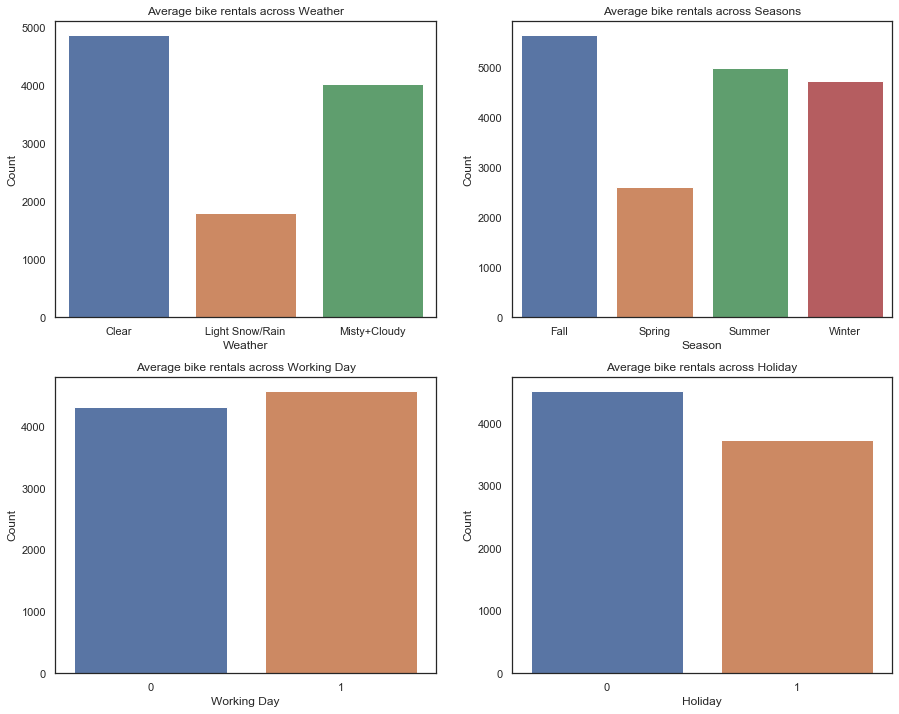

In [31]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(bikedata.groupby(['Weather'])['Count'].mean()).reset_index()
sns.barplot(data=group_weather, x='Weather', y='Count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(bikedata.groupby(['Season'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Season', y='Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(bikedata.groupby(['Workingday'])['Count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='Workingday', y='Count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(bikedata.groupby(['Holiday'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')

plt.show()

### Monthly Distribution

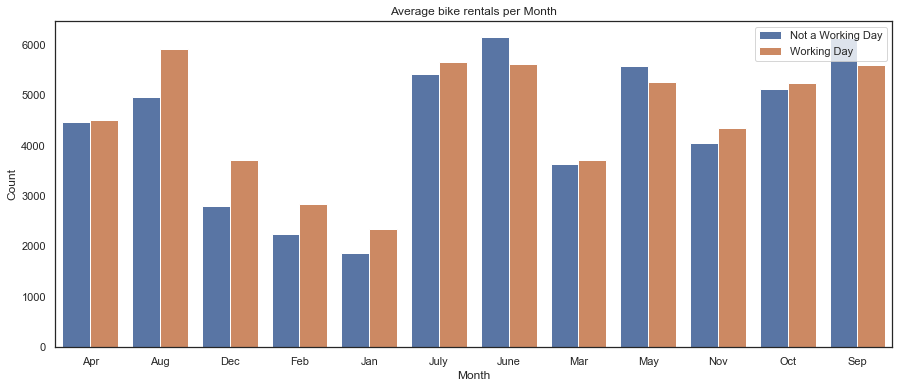

In [32]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(bikedata.groupby(['Month', 'Workingday'])['Count'].mean()).reset_index()
sns.barplot(data=group_month, x='Month', y='Count', hue='Workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

Using seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features 

## Outlier Analysis

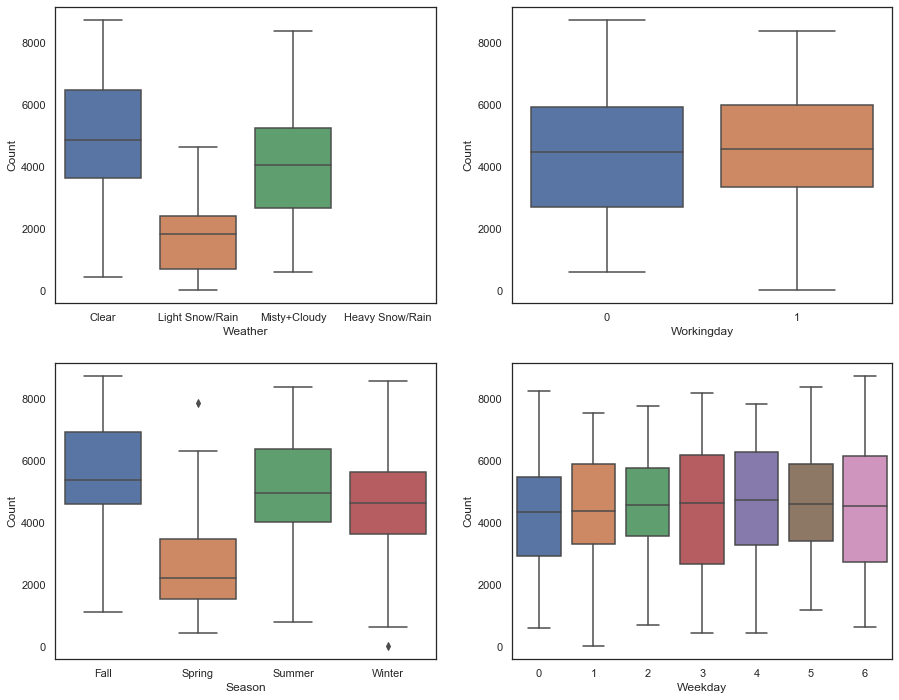

In [33]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear',  'Light Snow/Rain', 'Misty+Cloudy','Heavy Snow/Rain',]
sns.boxplot(data=bikedata, y='Count', x='Weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=bikedata, y='Count', x='Workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=bikedata, y='Count', x='Season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=bikedata, y='Count', x='Weekday', ax=axes[1][1])

plt.show()

**Few Observations**
+ Higher biker rentals as weather is more on clear. 
+ Bike reservations are lesser in Spring season compared to Summer and Fall
+ Lots of outlier points for a particular seasons or weather conditions. This is most likely due to variable distribution across the day

## Correlation Analysis

In [35]:
churn_corr = bikedata.corr()
cmap = cmap=sns.diverging_palette(15, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "12pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

churn_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '90px', 'font-size': '12pt'})\
    .set_caption("Correlation matrix")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Temperature,Atemperature,Humidity,Windspeed,Casual Users,Registered Users,Count
Temperature,1,0.99,0.13,-0.16,0.54,0.54,0.63
Atemperature,0.99,1,0.14,-0.18,0.54,0.54,0.63
Humidity,0.13,0.14,1,-0.25,-0.077,-0.091,-0.1
Windspeed,-0.16,-0.18,-0.25,1,-0.17,-0.22,-0.23
Casual Users,0.54,0.54,-0.077,-0.17,1,0.4,0.67
Registered Users,0.54,0.54,-0.091,-0.22,0.4,1,0.95
Count,0.63,0.63,-0.1,-0.23,0.67,0.95,1


Finding of correlation analysis -

+ temp and atemp are highly correlated.
+ temp and atemp have positive and strong coorelation with cnt.
+ hum and windspeed have negative and weak correlation with cnt.

### Heatmap Plot
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features

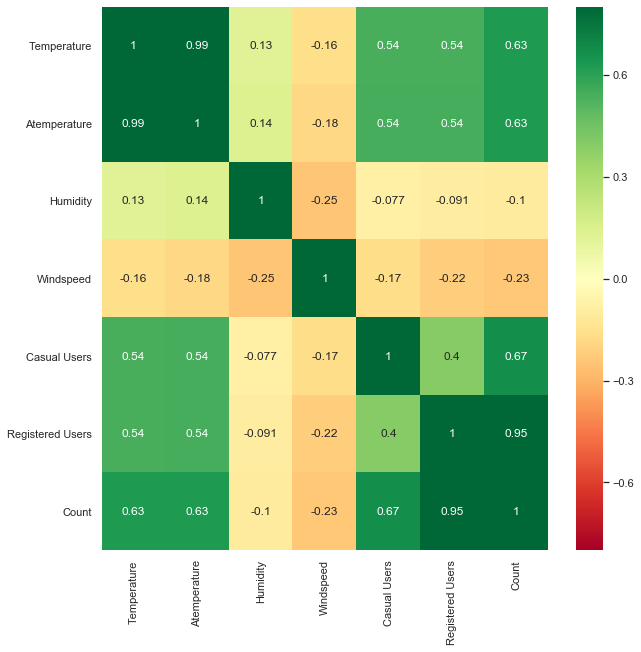

In [38]:
corr = bikedata.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

## Bivariate analysis

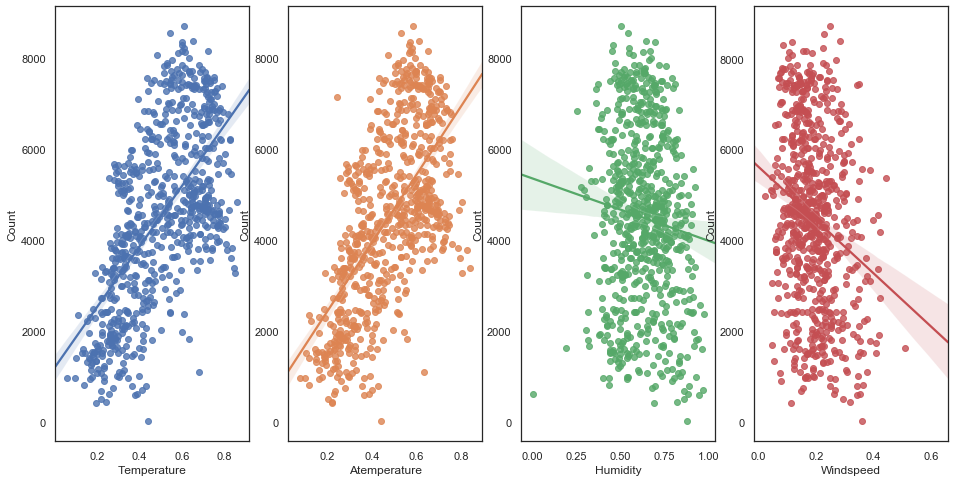

In [37]:
# Bivariate analysis of cnt and continous predictor

fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(16,8)

sns.regplot(x="Temperature",y="Count",data=bikedata,ax=ax1)
sns.regplot(x="Atemperature",y="Count",data=bikedata,ax=ax2)
sns.regplot(x="Humidity",y="Count",data=bikedata,ax=ax3)
sns.regplot(x="Windspeed",y="Count",data=bikedata,ax=ax4)

From the above plot, it is evident that cnt has a positive linear relationship with Temperature and Atemperature. On the other hand, cnt has a negative linear relationship with Windspeed. Humidity has a little negative linear relationship with Count.

**Inferences from the above heatmap**
* Temperature and Atemperature are highly correlated as expected,
* count is highly correlated with casual and registered as expected since count = casual + registered
* We see a positive correlation between count and temperature (as was seen in the regplot). This is probably only true for the range of Temperatures provided.
* We see a negative correlation between Count and Humidity. The more the Humidity, the less people prefer to bike
* Not a great amount of correlation between humidity and temperature, though
* Count has a weak dependence on Windspeed

## Distribution of target Variable

((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

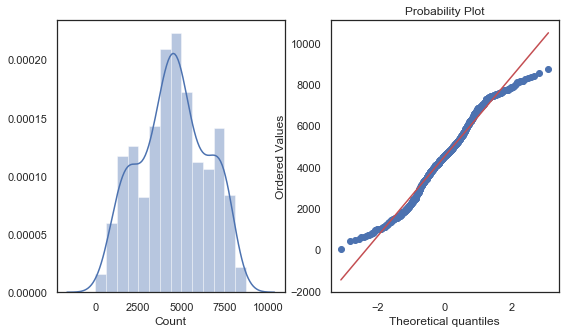

In [40]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9,5)
sns.distplot(bikedata["Count"],ax=ax1)
stats.probplot(bikedata["Count"], dist='norm', fit=True, plot=ax2)

As we can see, out cnt variable is very close to normal distribution.

### Preprocessing original data and Spliting into train and test data

In [41]:
# Rollback understandable text to numbers 
season_dict = { 'Spring' :'1', 'Summer' :'2', 'Fall' : '3', 'Winter' : '4'}
weather_dict = { 'Clear' :'1', 'Misty+Cloudy' : '2', 'Light Snow/Rain' : '3', 'Heavy Snow/Rain' : '4'}
month_dict = {'Jan' : '1', 'Feb' : '2', 'Mar' :'3', 'Apr' : '4', 'May' : '5', 'June' :'6', 'July' : '7', 'Aug' : '8', 'Sep' : '9', 'Oct' : '10', 'Nov' : '11', 'Dec' :'12'}
year_dict = { '2011' : '0', '2012' : '1'}
bikedata['Season'] = bikedata['Season'].map(season_dict)
bikedata['Weather'] = bikedata['Weather'].map(weather_dict)
bikedata['Month'] = bikedata['Month'].map(month_dict)
bikedata['Year'] = bikedata['Year'].map(year_dict)

bikedata.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Atemperature,Humidity,Windspeed,Casual Users,Registered Users,Count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
#selecting predictors
train_feature_space = bikedata.iloc[:,bikedata.columns != 'Count']
# selecting target class
target_class = bikedata.iloc[:,bikedata.columns == 'Count']

In [43]:
#droping Atemperature due to multicollinearity
#droping Casual Users and Registered Users because there sum is equal to target variable ie. 'Count'

train_feature_space = train_feature_space.drop(["Atemperature","Casual Users","Registered Users"],axis = 1)

In [44]:
train_feature_space.shape

(731, 10)

In [45]:
train_feature_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
Season         731 non-null object
Year           731 non-null object
Month          731 non-null object
Holiday        731 non-null category
Weekday        731 non-null category
Workingday     731 non-null category
Weather        731 non-null object
Temperature    731 non-null float64
Humidity       731 non-null float64
Windspeed      731 non-null float64
dtypes: category(3), float64(3), object(4)
memory usage: 42.8+ KB


In [46]:
# creating training and test set
training_set, test_set, train_target, test_target = train_test_split(train_feature_space,
                                                                    target_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 456)

# Cleaning test sets to avoid future warning messages
train_target = train_target.values.ravel() 
test_target = test_target.values.ravel()

## Linear Regression Model

In [49]:
X = training_set
X = sm.add_constant(X) 
y= np.log(train_target)

model = sm.OLS(y, X.astype(float)).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     94.40
Date:                Sun, 11 Aug 2019   Prob (F-statistic):          2.20e-108
Time:                        01:08:02   Log-Likelihood:                -184.70
No. Observations:                 511   AIC:                             391.4
Df Residuals:                     500   BIC:                             438.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6112      0.110     69.224      0.000       7.395       7.827
Season          0.1286      0.026      4.865      0.000       0.077       0.180
Year            0.4818      0.031     15.339      0.000       0.420       0.543
Month          -0.0069      0.008     -0.834      0.405      -0.023       0.009
Holiday        -0.1800      0.099     -1.815      0.070      -0.375       0.015
Weekday         0.0133      0.008      1.670      0.095      -0.002       0.029
Workingday      0.0577      0.035      1.655      0.099      -0.011       0.126
Weather        -0.2331      0.037     -6.228      0.000      -0.307      -0.160
Temperature     1.5244      0.094     16.269      0.000       1.340       1.708
Humidity       -0.2495      0.149     -1.677      0.094      -0.542       0.043
Windspeed      -1.0399      0.218     -4.760      0.000      -1.469      -0.611
==============================================================================
Omnibus:                      654.553   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128684.713
Skew:                          -6.061   Prob(JB):                         0.00
Kurtosis:                      79.792   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Initialize linear regression model
Model = LinearRegression()
Model.fit(X = training_set,y = np.log(train_target))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#predicting using linear regression
bikedata_Predictions = Model.predict(X=test_set)
bikedata=pd.DataFrame(np.exp(bikedata_Predictions))
bikedata.describe()

,0
count,220.000000
mean,4438.291596
std,2120.623071
min,1034.553984
25%,2730.336107
50%,4096.304410
75%,5708.079487
max,11000.217123


In [96]:
bikedata_errors = abs(np.exp(bikedata_Predictions) - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(bikedata_errors), 2), 'degrees.')

Mean Absolute Error: 899.5 degrees.


In [97]:
rmse = sqrt(mean_squared_error(test_target, np.exp(bikedata_Predictions)))
print("RMSE for test set in linear regression is :" , rmse)

RMSE for test set in linear regression is : 1222.1581373120362


Text(0, 0.5, 'Predictions')

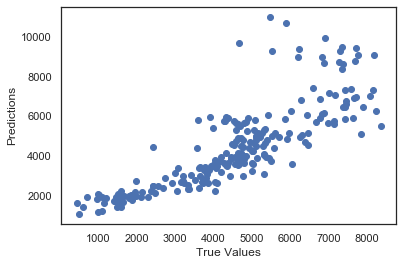

In [98]:
## The line / model
plt.scatter(test_target, np.exp(bikedata_Predictions))
plt.xlabel("True Values")
plt.ylabel("Predictions")

##  Random Forest Model

In [99]:
rf = RandomForestRegressor(random_state=12345)
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [102]:
np.random.seed(12)
start = time.time()

# selecting best max_depth, maximum features, split criterion and number of trees
parameter_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2',None],
              "n_estimators" : [100 ,200 ,300 ,400 ,500]
             }
RandomForest = RandomizedSearchCV(rf, cv = 10,
                     param_distributions = parameter_dist, 
                     n_iter = 10)

RandomForest.fit(training_set, train_target)
print('Best Parameters using random search: \n', 
      RandomForest.best_params_)
end = time.time()
print('Time taken in random search: {0: .2f}'.format(end - start))

Best Parameters using random search: 
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
Time taken in random search:  64.67


In [103]:
# setting parameters

# Set best parameters given by random search # Set be 
rf.set_params( max_features = 'log2',
               max_depth =8 ,
               n_estimators = 300
                )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [105]:
rf.fit(training_set, train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [106]:
# Use the forest's predict method on the test data
rfPredictions = rf.predict(test_set)
# Calculate the absolute errors
rf_errors = abs(rfPredictions - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'degrees.')

Mean Absolute Error: 495.28 degrees.


In [107]:
rmse_rf = sqrt(mean_squared_error(test_target, rfPredictions))
print("RMSE for test set in random forest regressor  is :" , rmse_rf)

RMSE for test set in random forest regressor  is : 649.6911207838448


### Variable importance for random forest

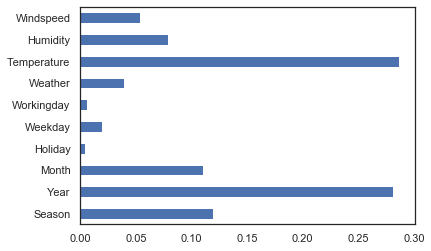

In [108]:
feature_importance =  pd.Series(rf.feature_importances_, index=training_set.columns)
feature_importance.plot(kind='barh')

In [109]:
#model input and output
pd.DataFrame(test_set).to_csv('InputLinearRegressionRandomForestPyhon.csv', index = False)
pd.DataFrame(np.exp(bikedata_Predictions), columns=['predictions']).to_csv('outputLinearRegressionPython.csv')
pd.DataFrame(rfPredictions, columns=['predictions']).to_csv('outputRandomForestPython.csv')